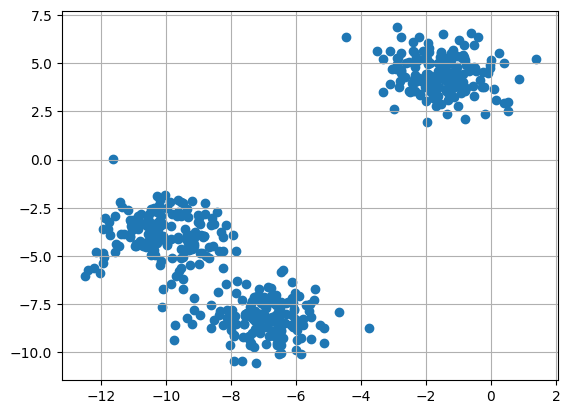

In [49]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 1)
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

{0: {'center': array([0.06919154, 1.78785042]), 'points': []}, 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []}, 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}


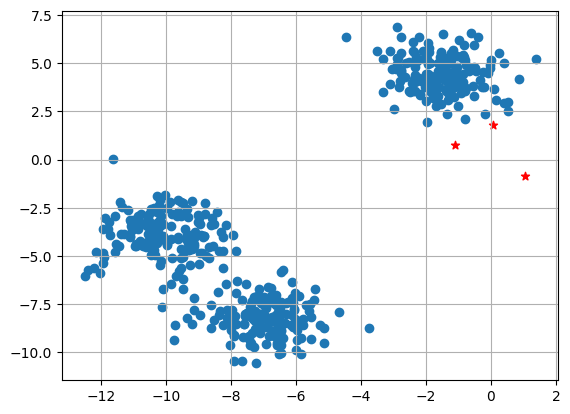

In [50]:
import numpy as np 
k = 3
clusters = {}
np.random.seed(23)
for i in range(k):
 center = 2*(2*np.random.random((X.shape[1],))-1)
 points = []
 cluster = {'center' : center,'points' : [] }
 clusters[i] = cluster
print(clusters)
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
 center = clusters[i]['center']
 plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()


In [51]:
def distance(p1,p2):
 return np.sqrt(np.sum((p1-p2)**2))

In [52]:
def assign_clusters(X, clusters):
 for i in range(X.shape[0]):
  dist = []
  curr_x = X[i]
  for j in range(k):
   dis = distance(curr_x,clusters[j]['center'])
   dist.append(dis)
   curr_cluster = np.argmin(dist)
   clusters[curr_cluster]['points'].append(curr_x)
 return clusters

In [53]:
def update_clusters(X, clusters):
 for i in range(k):
  points = np.array(clusters[i]['points'])
  if points.shape[0] > 0:
   new_center = points.mean(axis =0)
  clusters[i]['center'] = new_center
  clusters[i]['points'] = []
 return clusters

In [54]:
def pred_cluster(X, clusters):
 pred = []
 for i in range(X.shape[0]):
  dist = []
  for j in range(k):
   dist.append(distance(X[i],clusters[j]['center']))
   pred.append(np.argmin(dist))
 return pred

ValueError: 'c' argument has 1500 elements, which is inconsistent with 'x' and 'y' with size 500.

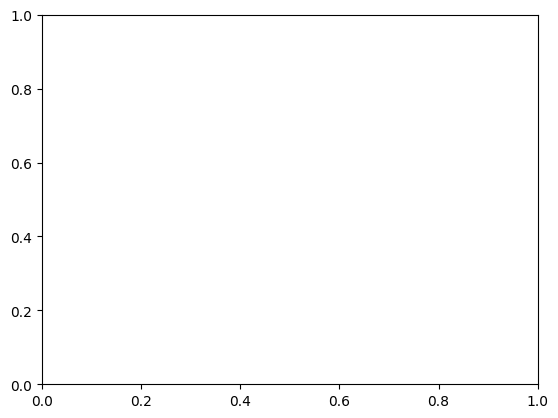

In [55]:
plt.scatter(X[:,0],X[:,1],c = pred_cluster(X,clusters))
for i in clusters:
 center = clusters[i]['center']
 plt.scatter(center[0],center[1],marker = '+',c = 'red')
plt.show()

# EXO 02 :


In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Build and train K-means classifier with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=5, random_state=42)

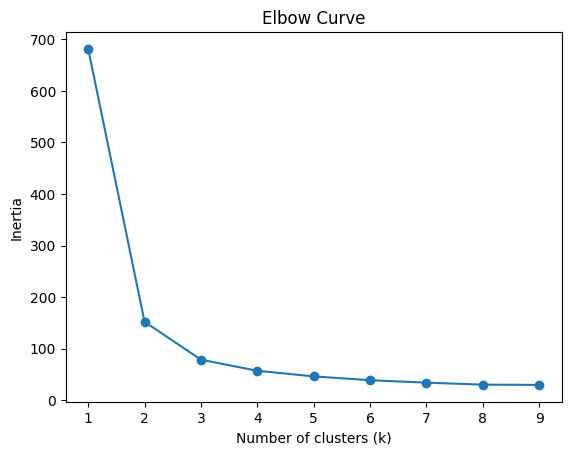

In [ ]:
import matplotlib.pyplot as plt

# Calculate inertia for different k values
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


In [ ]:
# Build the model with the optimal k-value
optimal_k = 3
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X)


KMeans(n_clusters=3, random_state=42)

In [ ]:
# Cluster centers
cluster_centers = kmeans_optimal.cluster_centers_
print("Cluster centers:\n", cluster_centers)


Cluster centers:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [ ]:
# Predict cluster labels
cluster_labels = kmeans_optimal.predict(X)
print("Cluster labels for each observation:\n", cluster_labels)


Cluster labels for each observation:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [ ]:
# Predict the class of a new observation
new_observation = [[0.8, 0.8, 0.8, 0.8]]
predicted_cluster = kmeans_optimal.predict(new_observation)
print("Predicted cluster for the new observation:", predicted_cluster)


Predicted cluster for the new observation: [1]
